In [1]:
import matplotlib.pyplot as plt
import numpy as np

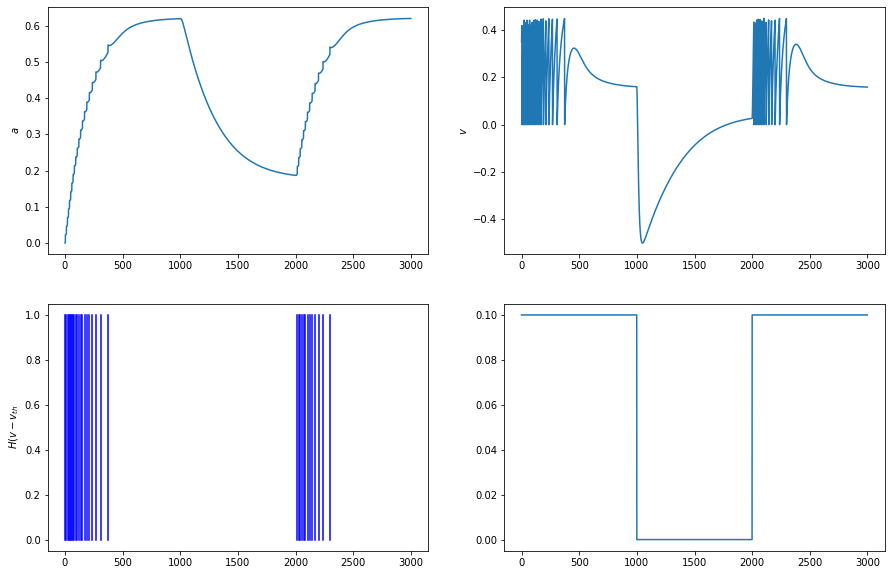

In [5]:
def neuron(t_m, t_a, t_s, theta, a_s, a_current, v_r, v_th, v0, a0, i0, n, dt, inputs):
    v, a, I, z_a = np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)

    v[0] = v0
    a[0] = a0
    I[0] = i0 + inputs[0]

    for i in range(1, n):
        v[i] = v[i - 1] + dt / t_m * (
            -v[i - 1] + I[i - 1] + theta * np.exp((v[i - 1] - v_th) / theta) - a[i - 1]
        )
        a[i] = a[i - 1] + dt / t_a * (a_current * v[i - 1] - a[i - 1])
        I[i] = I[i - 1] - dt / t_s * I[i - 1] + inputs[i]

        z = v[i] > v_th
        z = int(z)
        v[i] = v[i] * (1 - z) + v_r * z
        a[i] = a[i] + z * a_s
        z_a[i] = z
    return v, a, I, z_a


dt = 1e-3
t_a = 2
t_m = 10 * dt
t_s = 5 * dt
v_th = 0.45
v_reset = 0.0
theta = 0.5
a_s = 0.02
a_current = 4

v0 = 0.35
a0 = 0
i0 = 0
n = 3000
inputs = np.ones(n) * 0.1
inputs[1000:2000] = 0
# inputs[int(len(inputs) / 2): int(len(inputs) / 2) + 400]
# inputs[int(len(inputs) / 3):] = 0
v, a, i, z = neuron(
    t_m, t_a, t_s, theta, a_s, a_current, v_reset, v_th, v0, a0, i0, n, dt, inputs
)

fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(221)
plt.plot(a)
plt.ylabel("$a$")
ax = fig.add_subplot(222)
plt.plot(v)
plt.ylabel("$v$")
ax = fig.add_subplot(223)
for i in range(n):
    plt.plot([i, i], [0, z[i]], c="b")
plt.ylabel(r"$H(v - v_{th}$")
ax = fig.add_subplot(224)
plt.plot(inputs)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


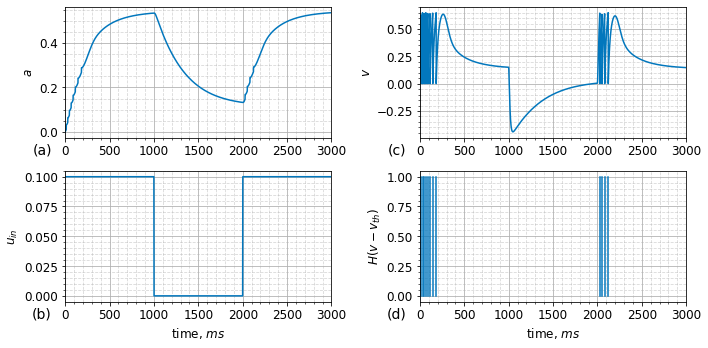

In [11]:
def grid_enable():
    plt.minorticks_on()
    plt.grid(True)
    plt.grid(which="minor", alpha=0.5, linestyle="--")
    plt.xlim([0, 3000])


fig = plt.figure(figsize=(10, 5))
c = "#0277BD"
plt.rcParams.update({"font.size": 12})
ax = fig.add_subplot(221)
ax.text(
    -0.05, -0.15, "(a)", transform=ax.transAxes, fontsize=14, va="bottom", ha="right"
)
plt.plot(a, c=c)
plt.ylabel("$a$")
grid_enable()
ax = fig.add_subplot(222)
ax.text(
    -0.05, -0.15, "(c)", transform=ax.transAxes, fontsize=14, va="bottom", ha="right"
)
plt.plot(v, c=c)
plt.ylabel("$v$")
grid_enable()
ax = fig.add_subplot(224)
ax.text(
    -0.05, -0.15, "(d)", transform=ax.transAxes, fontsize=14, va="bottom", ha="right"
)
for i in range(n):
    plt.plot([i, i], [0, z[i]], c=c)
plt.ylabel(r"$H(v - v_{th})$")
plt.xlabel("time, $ms$")
grid_enable()
ax = fig.add_subplot(223)
ax.text(
    -0.05, -0.15, "(b)", transform=ax.transAxes, fontsize=14, va="bottom", ha="right"
)
plt.plot(inputs, c=c)
plt.ylabel("$u_{in}$")
plt.xlabel("time, $ms$")
grid_enable()
plt.tight_layout()
plt.savefig("LifAdexNeuron.eps", format="eps")
plt.savefig("LifAdexNeuron.svg", format="svg")
plt.savefig("LifAdexNeuron.pdf", format="pdf")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


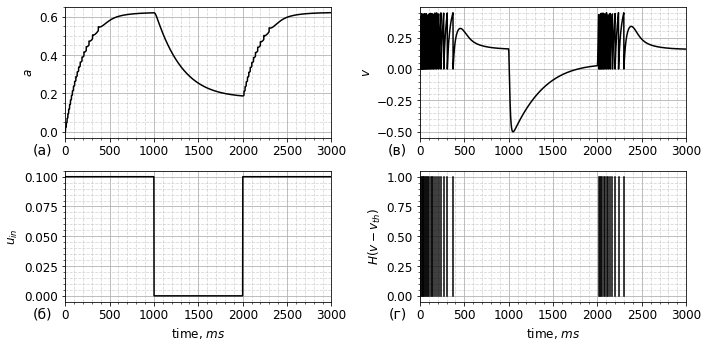

In [6]:
def grid_enable():
    plt.minorticks_on()
    plt.grid(True)
    plt.grid(which="minor", alpha=0.5, linestyle="--")
    plt.xlim([0, 3000])


fig = plt.figure(figsize=(10, 5))
c = "black"
plt.rcParams.update({"font.size": 12})
ax = fig.add_subplot(221)
ax.text(
    -0.05, -0.15, "(а)", transform=ax.transAxes, fontsize=14, va="bottom", ha="right"
)
plt.plot(a, c=c)
plt.ylabel("$a$")
grid_enable()
ax = fig.add_subplot(222)
ax.text(
    -0.05, -0.15, "(в)", transform=ax.transAxes, fontsize=14, va="bottom", ha="right"
)
plt.plot(v, c=c)
plt.ylabel("$v$")
grid_enable()
ax = fig.add_subplot(224)
ax.text(
    -0.05, -0.15, "(г)", transform=ax.transAxes, fontsize=14, va="bottom", ha="right"
)
for i in range(n):
    plt.plot([i, i], [0, z[i]], c=c)
plt.ylabel(r"$H(v - v_{th})$")
plt.xlabel("time, $ms$")
grid_enable()
ax = fig.add_subplot(223)
ax.text(
    -0.05, -0.15, "(б)", transform=ax.transAxes, fontsize=14, va="bottom", ha="right"
)
plt.plot(inputs, c=c)
plt.ylabel("$u_{in}$")
plt.xlabel("time, $ms$")
grid_enable()
plt.tight_layout()
plt.savefig("LifAdexNeuron.eps", format="eps")
plt.savefig("LifAdexNeuron.svg", format="svg")
plt.savefig("LifAdexNeuron.pdf", format="pdf")
plt.savefig("LifAdexNeuron.png", dpi=1500)